# Nested function
Define data type for nested function.

In [2]:
import numpy as np
from typing import Callable, List

Array_Function = Callable[[np.ndarray], np.ndarray]
Chain = List[Array_Function]

def chain_length_2(chain: Chain,
                   a: np.ndarray) -> np.ndarray:
    '''
    To calculate the chain length of func(x) with respect to a
    :param chain: function chain
    :param a: auto variable
    :return: derivative of func chain with respect to a
    '''
    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(a))

def chain_length_n(chain: Chain,
                   a: np.ndarray) -> np.ndarray:
    '''
    To calculate the chain length of func(x) with respect to a
    :param chain: function chain
    :param a: auto variable
    :return: derivative of func chain with respect to a
    '''
    result = a
    for item in chain:
        result = item(result)
    return result

# Chain rule
Derivative of nested function: **Chain Rule**!

Before illustration of chain rule, first I need function 'deriv' from previous 'derivative.ipynb' file

In [6]:
!pip install nbimporter

Well, still not working. Never mind, I put function 'deriv' into 'derivatie.py' instead.

In [9]:
# import nbimporter
import numpy as np
from derivative import deriv

def sigmoid(x: np.ndarray) -> np.ndarray:
    '''
    To calculate the sigmoid of func(x) with respect to x
    :param x:
    :return:
    '''
    return 1 / (1 + np.exp(-x))

def chain_deriv_2(chain: Chain,
                  input_range: np.ndarray) -> np.ndarray:
    '''
    To calculate the order-2 derivative of func(x) with respect to x
    :param chain:
    :param input_range:
    :return:
    '''
    assert len(chain) == 2, \
    "This function requires 'Chain' objects of length 2."

    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range."

    f1 = chain[0]
    f2 = chain[1]

    df1dx = deriv(f1, input_range)
    df2du = deriv(f2, f1(input_range))

    return df1dx * df2du

# Visualization
To visualize the rusult, I created some functions for visualiztion.

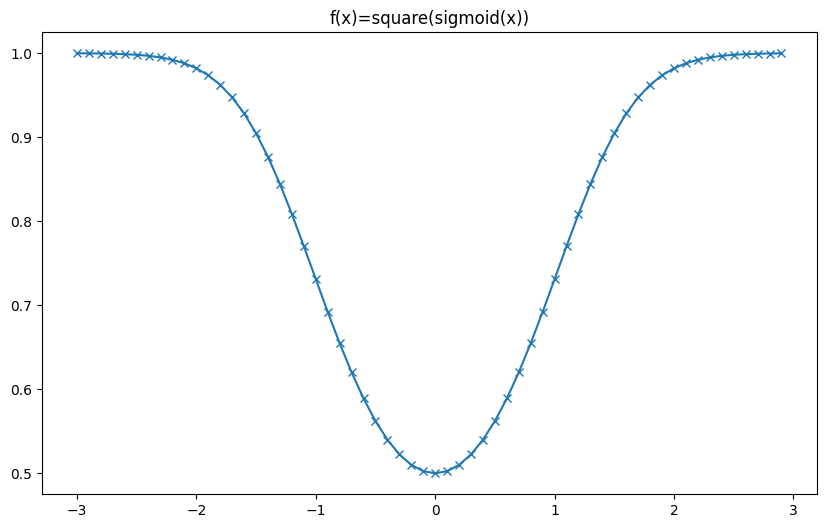

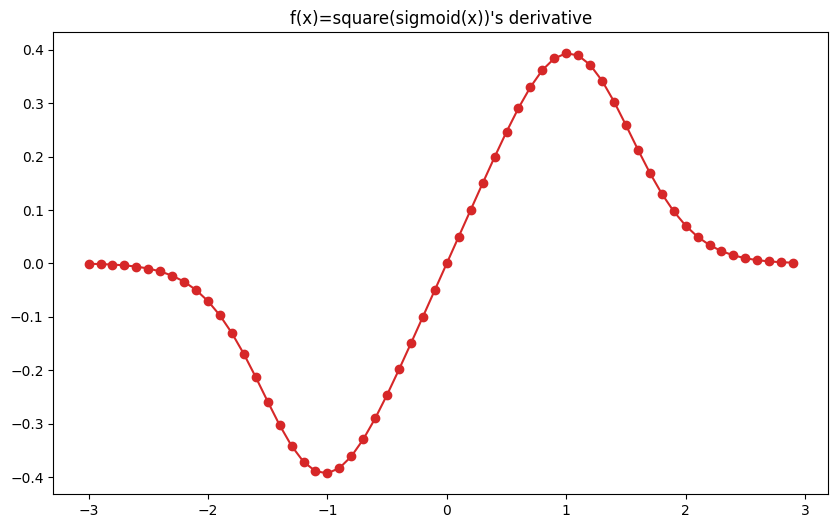

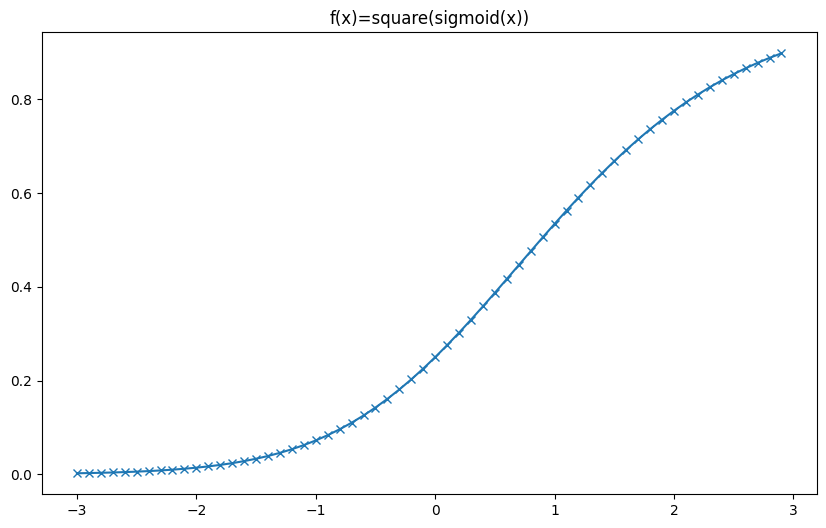

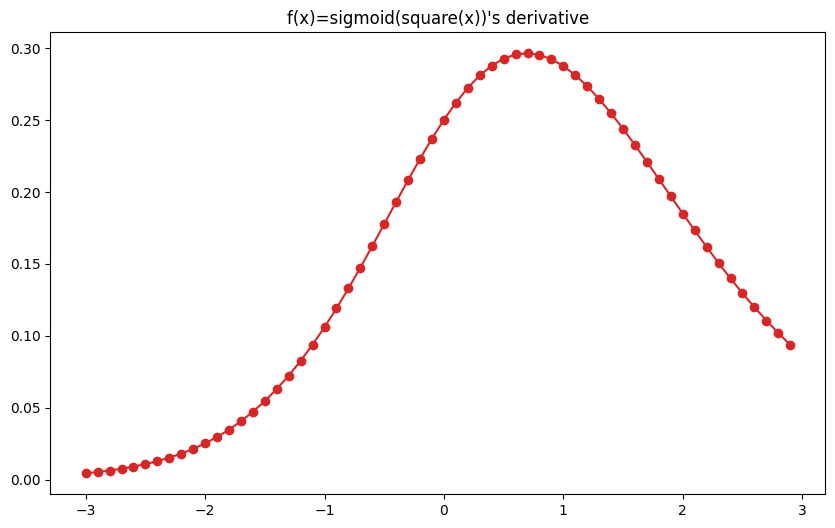

In [11]:
from square import square

def plot_chain(chain: Chain,
               input_range: np.ndarray) -> None:
    '''
    To plot the fucntion chain w.r.t. input_range
    :param chain:
    :param input_range:
    :return:
    '''
    import matplotlib.pyplot as plt

    f_result = input_range
    for item in chain:
        f_result = item(f_result)

    fig1 = plt.figure(figsize=(10, 6))
    ax1 = fig1.add_subplot()
    ax1.plot(input_range, f_result, color='tab:blue', marker='x')

    set_title(ax1, chain_1)

    return None

from matplotlib.axes import Axes
def set_title(ax: Axes,
              chain: Chain,
              note: str=''
              ) -> None:
    title_name = 'f(x)=' + chain[0].__name__
    for index, item in enumerate(chain):
        if index == 0:
            continue
        title_name += '(' + item.__name__
    title_name += '(x' + ')' * len(chain) + note
    ax.set_title(title_name)

    return None

def plot_chain_deriv_2(chain: Chain,
                       input_range: np.ndarray) -> None:
    f = chain_deriv_2(chain, input_range)

    import matplotlib.pyplot as plt

    fig2 = plt.figure(figsize=(10, 6))
    ax2 = fig2.add_subplot()
    ax2.plot(input_range, f, color='tab:red', marker='o')

    set_title(ax2, chain, note="\'s derivative")

    return None

PLOT_RANGE = np.arange(-3, 3, 0.1)

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

plot_chain(chain_1, PLOT_RANGE)
plot_chain_deriv_2(chain_1, PLOT_RANGE)

plot_chain(chain_2, PLOT_RANGE)
plot_chain_deriv_2(chain_2, PLOT_RANGE)

# Triple nested function
Double nested function is OK now, let's see triple one.

In [12]:
def chain_deriv_3(chain: Chain,
                  input_range: np.ndarray) -> np.ndarray:
    '''
    To calculate the order-3 derivative of func(x) with respect to x
    :param chain:
    :param input_range:
    :return:
    '''
    assert len(chain) == 3, \
        "This function requires 'Chain' objects of length 3."

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    f1_of_x = f1(input_range)
    f2_of_x = f2(input_range)
    f3_of_x = f3(input_range)

    df1dx = deriv(f1, input_range)
    df2du = deriv(f2, f1(input_range))
    df3du = deriv(f3, f2(input_range))

    return df1dx * df2du * df3du

# N-nested function


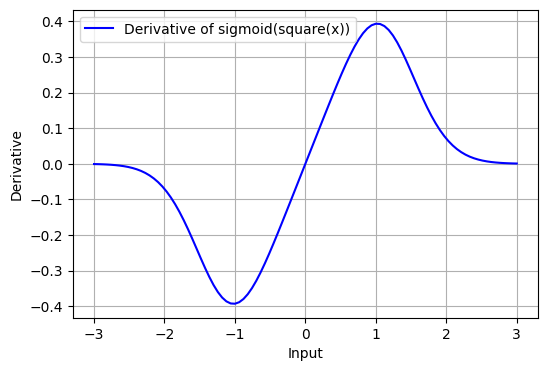

In [13]:
def chain_deriv_n(chain: Chain,
                  input_range: np.ndarray) -> np.ndarray:
    '''
    To calculate the order-3 derivative of func(x) with respect to x
    :param chain:
    :param input_range:
    :return:
    '''
    f = list()
    f.append(input_range)

    for func in chain:
        f.append(func(f[-1]))

    df = np.ones_like(input_range)

    for index, item in enumerate(chain):
        df *= deriv(item, f[index])

    return df

import matplotlib.pyplot as plt

# 定义函数
def square(x):
    return x ** 2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 定义输入范围
PLOT_RANGE = np.linspace(-3, 3, 100)

# 组合函数：先平方，再过 Sigmoid
chain_1 = [square, sigmoid]

# 计算复合函数的数值导数
derivative_values = chain_deriv_n(chain_1, PLOT_RANGE)

# 画出导数曲线
plt.figure(figsize=(6, 4))
plt.plot(PLOT_RANGE, derivative_values, label="Derivative of sigmoid(square(x))", color="blue")
plt.xlabel("Input")
plt.ylabel("Derivative")
plt.legend()
plt.grid(True)
plt.show()


As is shown in the figure above, everything works just fine!